In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scrnatools as rna
from matplotlib.colors import LinearSegmentedColormap

In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False

Data paths

In [3]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

In [4]:
# rawDataPath = "/mnt/e/Archive/Joe/raw_data/"
# processedDataPath = "/mnt/e/Archive/Joe/processed_data/"

# Import data

In [5]:
adata = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/combined_all_genes_TECs.h5ad")
# Subset on WT cells
adata = adata[adata.obs.genotype == "WT"]
signatures = pd.read_csv("../analysis/cell_type_signatures/merged_epithelium_fine_skin_signatures.csv", index_col=0, header=0)

# Subset on PA populations

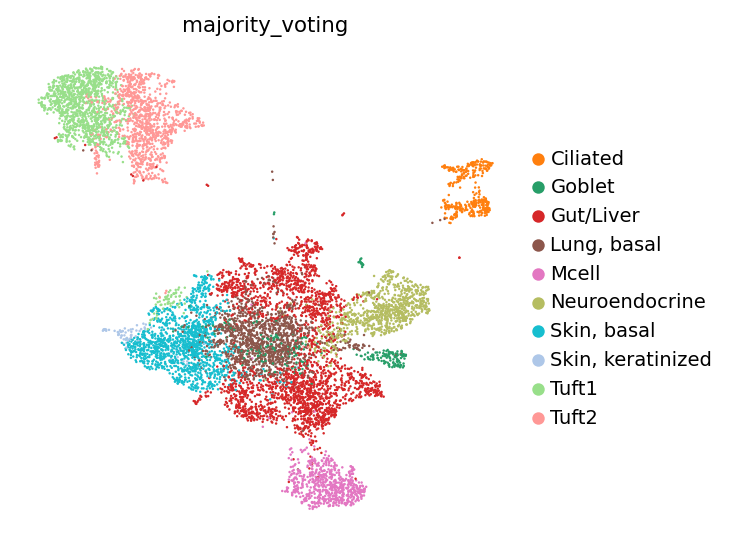

In [6]:
adata = adata[~adata.obs.majority_voting.isin(["adult cTEC", "Aire-stage", "Immature MEC", "TA MEC"])].copy()
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color=["majority_voting"],
    s=5,
)

# Subset on HVGs

In [7]:
sc.pp.highly_variable_genes(
    adata,
    layer="raw_counts",
    n_top_genes=5000,
    flavor="seurat_v3",
    batch_key="batch",
    subset=True,
)

In [8]:
adata = rna.tl.cell_type_similarity(
    adata,
    signatures,
)

In [9]:
epithelialSimilarities = [i for i in adata.obs.columns if "similarity" in i]

# All signatures

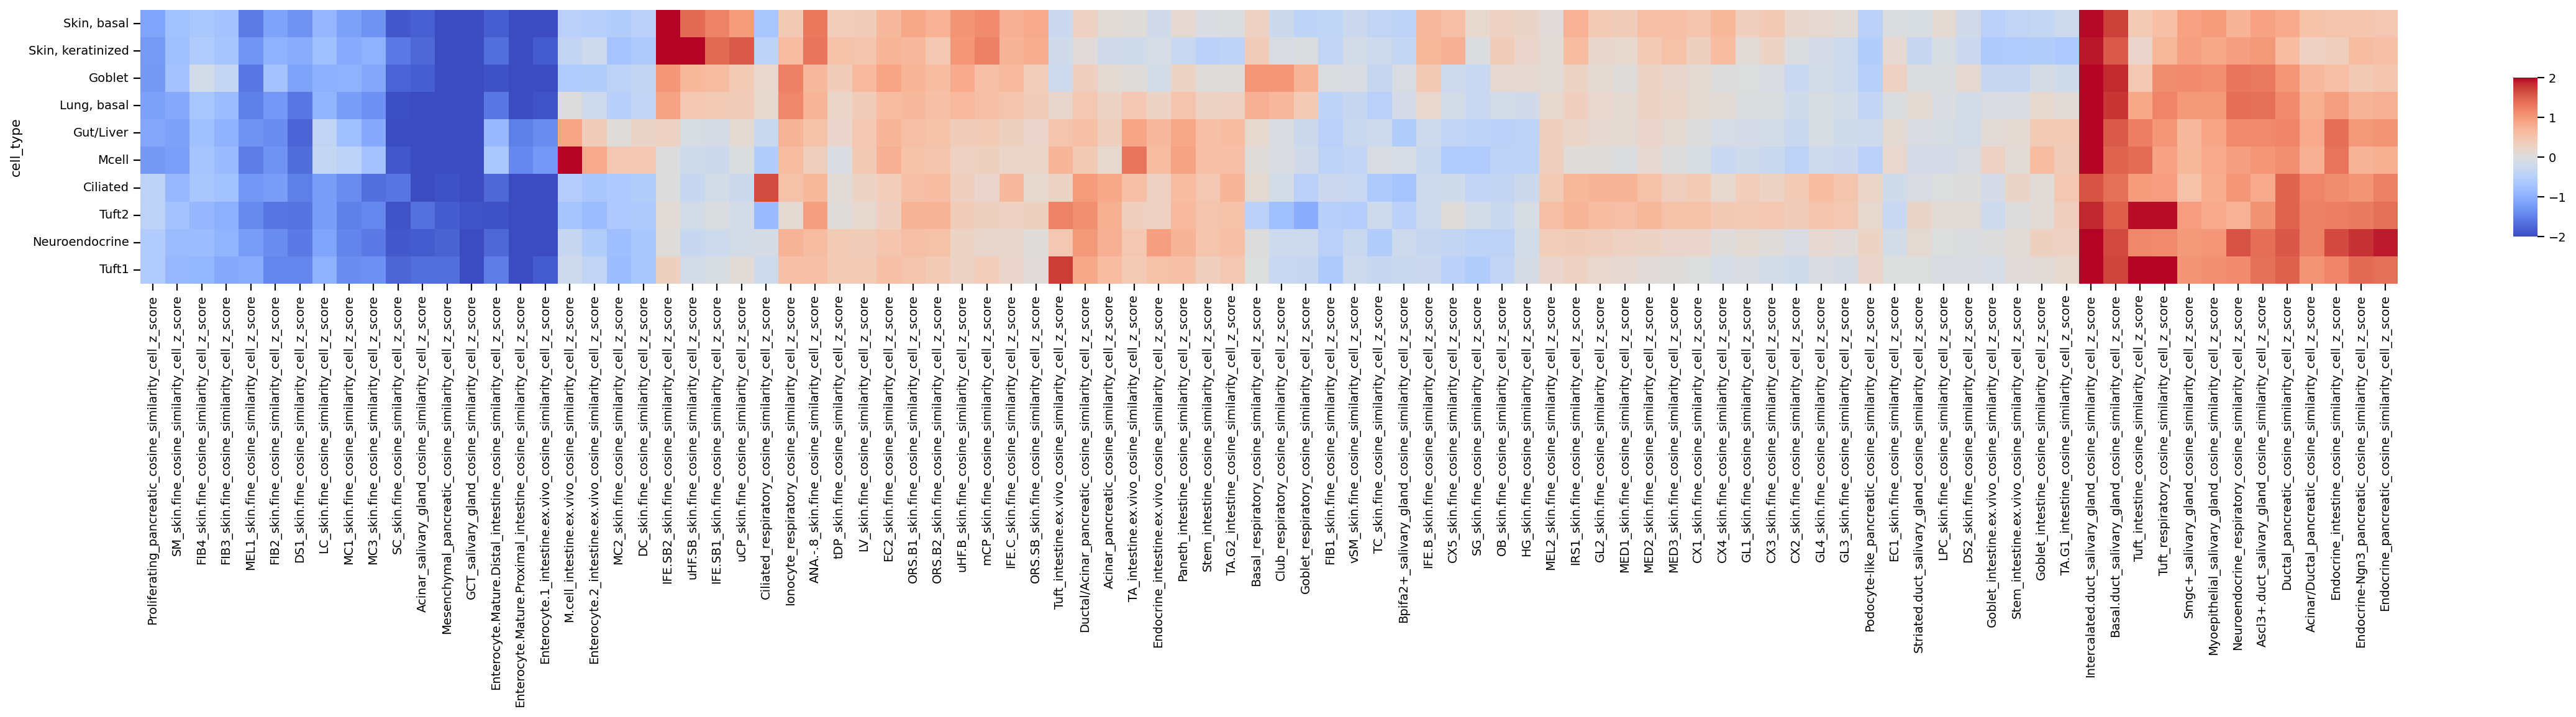

In [10]:
data = adata.obs[epithelialSimilarities].copy()
data["cell_type"] = adata.obs.majority_voting
data = data.groupby("cell_type").mean()
cg = sns.clustermap(
    data,
    cmap="coolwarm",
    figsize=(30,8),
    xticklabels=True,
    vmin=-2,
    vmax=2,
)
cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_yticklabels(), rotation=0)
cg.ax_heatmap.yaxis.tick_left()
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
cg.ax_heatmap.yaxis.set_label_position("left")
cg.ax_cbar.set_position([0.99, 0.61, 0.008, 0.2])
plt.show()

# Selected signatures

In [20]:
selectedScores = list(data.T[data.max() - data.median() > 0.75].index)

In [21]:
selectedScores

['IFE.B_skin.fine_cosine_similarity_cell_z_score',
 'IFE.SB1_skin.fine_cosine_similarity_cell_z_score',
 'IFE.SB2_skin.fine_cosine_similarity_cell_z_score',
 'uHF.SB_skin.fine_cosine_similarity_cell_z_score',
 'mCP_skin.fine_cosine_similarity_cell_z_score',
 'uCP_skin.fine_cosine_similarity_cell_z_score',
 'CX5_skin.fine_cosine_similarity_cell_z_score',
 'MC2_skin.fine_cosine_similarity_cell_z_score',
 'DC_skin.fine_cosine_similarity_cell_z_score',
 'Tuft_intestine_cosine_similarity_cell_z_score',
 'Enterocyte.Mature.Proximal_intestine_cosine_similarity_cell_z_score',
 'Enterocyte.Mature.Distal_intestine_cosine_similarity_cell_z_score',
 'M.cell_intestine.ex.vivo_cosine_similarity_cell_z_score',
 'Tuft_intestine.ex.vivo_cosine_similarity_cell_z_score',
 'TA_intestine.ex.vivo_cosine_similarity_cell_z_score',
 'Enterocyte.2_intestine.ex.vivo_cosine_similarity_cell_z_score',
 'Endocrine-Ngn3_pancreatic_cosine_similarity_cell_z_score',
 'Endocrine_pancreatic_cosine_similarity_cell_z_score'

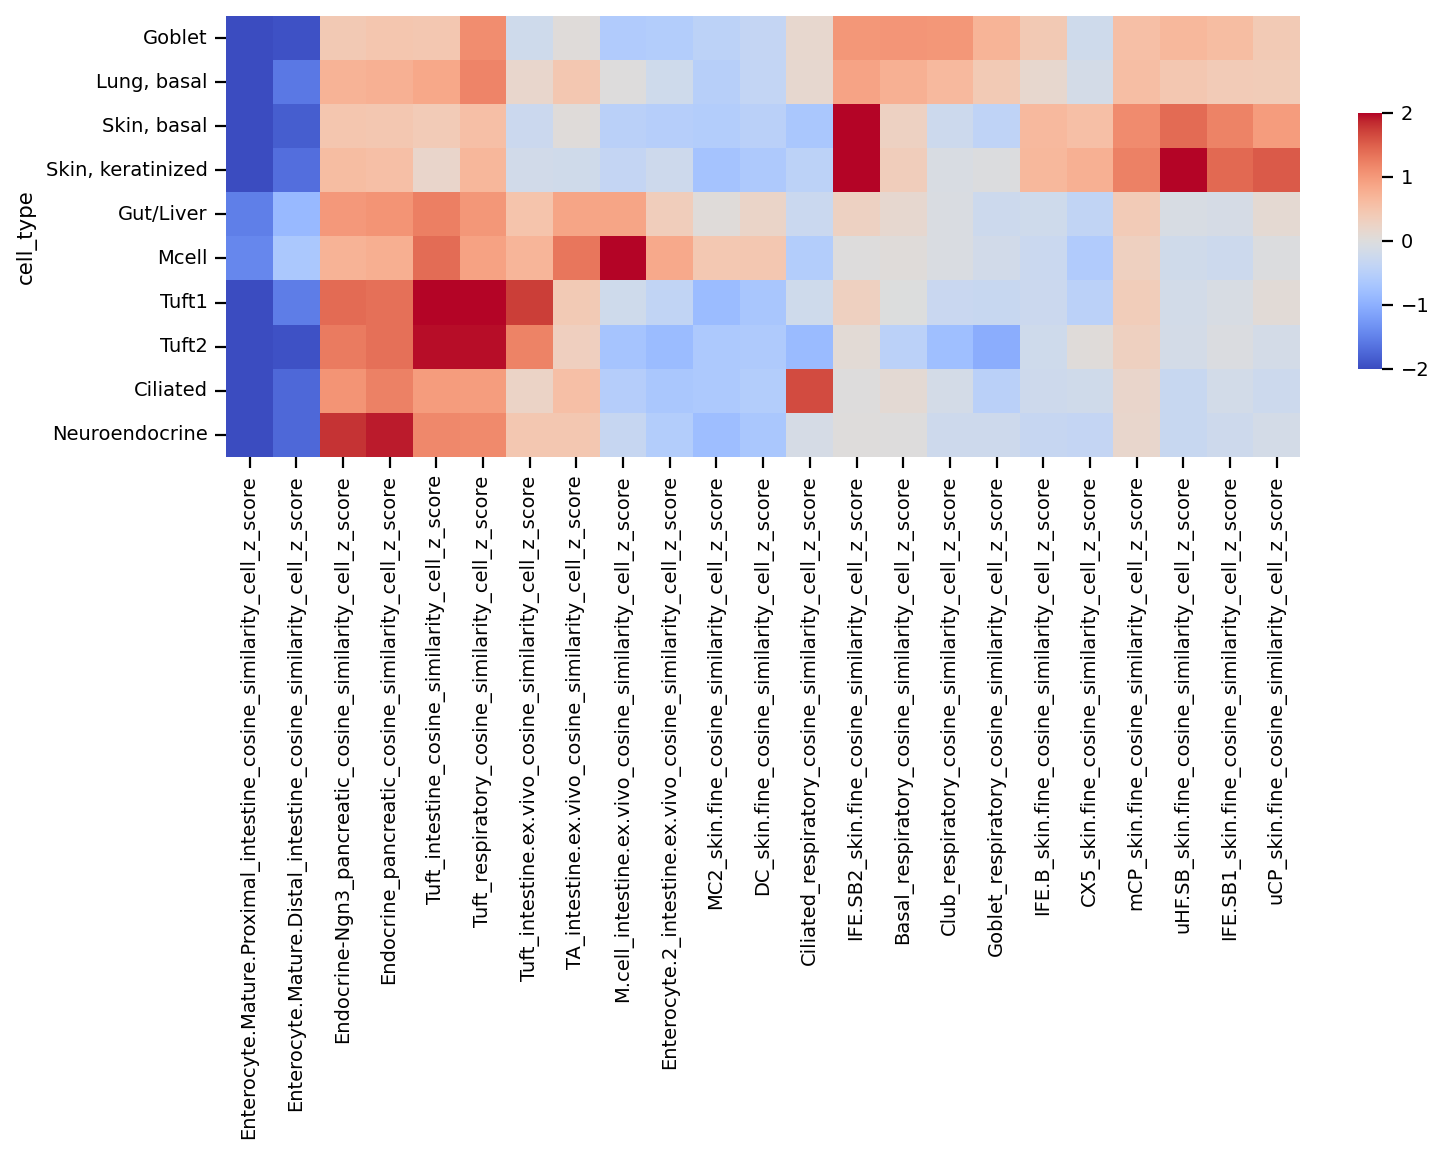

In [22]:
cg = sns.clustermap(
    data[selectedScores],
    cmap="coolwarm",
    figsize=(10,8),
    xticklabels=True,
    vmin=-2,
    vmax=2,
)
cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_yticklabels(), rotation=0)
cg.ax_heatmap.yaxis.tick_left()
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
cg.ax_heatmap.yaxis.set_label_position("left")
cg.ax_cbar.set_position([0.89, 0.62, 0.015, 0.2])
plt.show()

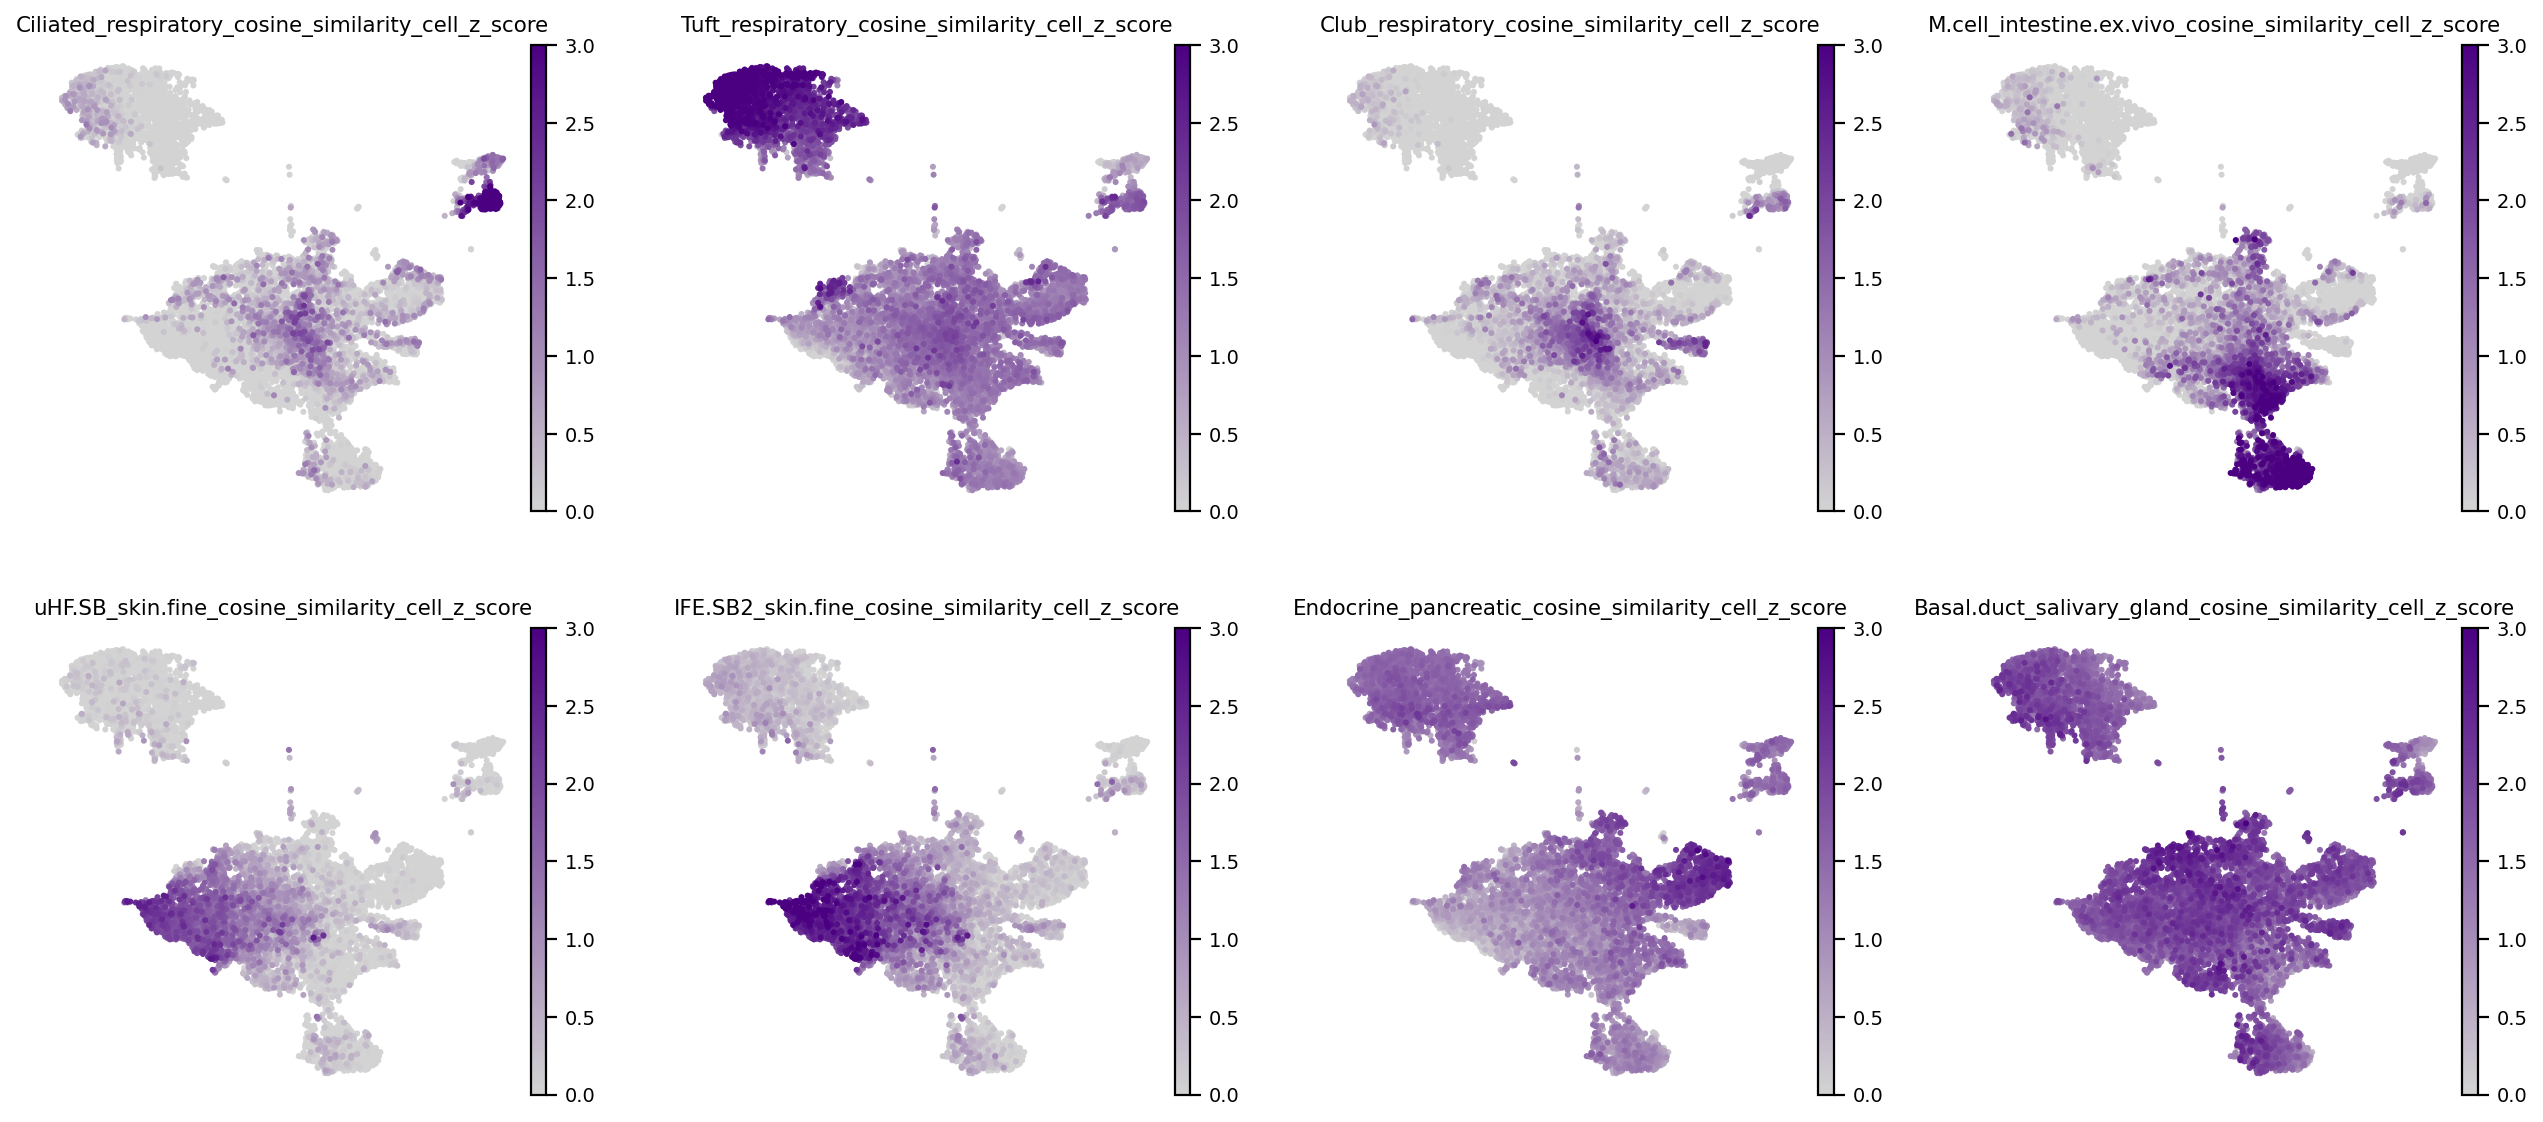

In [25]:
scores = [
    "Ciliated_respiratory_cosine_similarity_cell_z_score",
    "Tuft_respiratory_cosine_similarity_cell_z_score",
    "Club_respiratory_cosine_similarity_cell_z_score",
    "M.cell_intestine.ex.vivo_cosine_similarity_cell_z_score",
    "uHF.SB_skin.fine_cosine_similarity_cell_z_score",
    'IFE.SB2_skin.fine_cosine_similarity_cell_z_score',
    'Endocrine_pancreatic_cosine_similarity_cell_z_score',
    'Basal.duct_salivary_gland_cosine_similarity_cell_z_score'
]
colors = ["lightgrey", "indigo"]
colormap = LinearSegmentedColormap.from_list("GyPl", colors)
sc.pl.umap(
    adata,
    color=scores,
    legend_loc="on data",
    legend_fontsize="xx-small",
    cmap=colormap,
    vmin=0,
    vmax=3,
    s=30,
)